<a href="https://colab.research.google.com/github/sttesta3/7506R-1C2024-GRUPO08/blob/santiago/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# General libs
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


Primero junto la data y limpio ( lineal y KNN  requieren numericos sin null ) \
Creo un unico dataset con las columnas x e y, dropeo los null \
Imprimo dataset antes y despues ( aprox 75% recortado <- REVISAR )

In [20]:
# Ruta donde van a estar todos los datasets
ruta = "https://raw.githubusercontent.com/sttesta3/7506R-1C2024-GRUPO08/santiago/datasets/"
x_train = pd.read_csv(ruta + "x_columnas_entrenamiento.csv")
y_train = pd.read_csv(ruta + "y_precios_entrenamiento.csv")
train = x_train.join(y_train)

x_test = pd.read_csv(ruta + "x_columnas_test.csv")
y_test = pd.read_csv(ruta + "y_precios_test.csv")

# Creamos dataset de TEST y limpiamos
test = x_test.join(y_test)
test_knn = test.select_dtypes(include='float64')

test_knn.info()
test_knn.dropna(inplace=True)
test_knn.info()

x_test_knn=pd.DataFrame(test_knn, columns=["latitud","longitud","property_bedrooms","property_rooms","property_surface_total","property_surface_covered"])
y_test_knn=test_knn.property_price

# Creamos dataset de TEST y limpiamos
x_train_knn = x_train.select_dtypes(include='float64')
y_train_knn = y_train.select_dtypes(include='float64')
train_knn = x_train_knn.join(y_train_knn)

train_knn.info()
train_knn.dropna(inplace=True)
train_knn.info()

y_train_knn=train_knn.property_price
x_train_knn=pd.DataFrame(train_knn, columns=["latitud","longitud","property_bedrooms","property_rooms","property_surface_total","property_surface_covered"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19099 entries, 0 to 19098
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   18291 non-null  float64
 1   longitud                  18291 non-null  float64
 2   property_rooms            18879 non-null  float64
 3   property_bedrooms         16862 non-null  float64
 4   property_surface_total    18122 non-null  float64
 5   property_surface_covered  18402 non-null  float64
 6   property_price            18839 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 14558 entries, 0 to 19097
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitud                   14558 non-null  float64
 1   longitud                  14558 non-null  float64
 2   property_rooms            145

ANalisis grafico y estadistico de correlaciones

[Text(0.5, 0, 'Variable')]

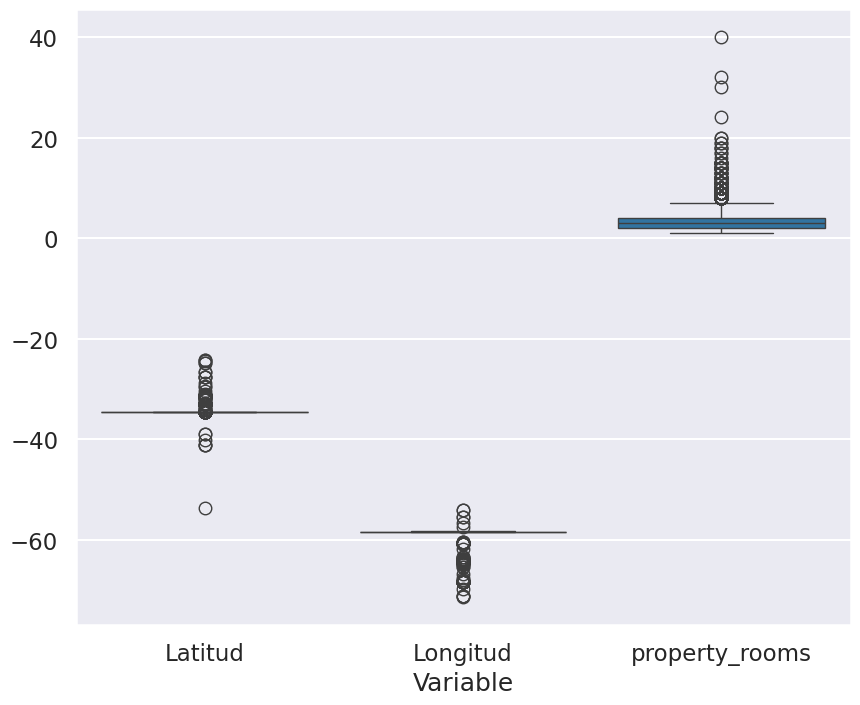

In [3]:
#Grafico Boxplot Conjunto
sns.set_context('talk')
sns.set_style("darkgrid")

variables=[]
valores=[]

variables =['Latitud']*len(list(x_train_knn.latitud)) + ['Longitud']*len(list((x_train_knn.longitud ))) + ['property_rooms']*len(list(x_train_knn.property_rooms))

valores=list(x_train_knn.latitud) + list(x_train_knn.longitud)+list(x_train_knn.property_rooms)

plt.figure(figsize=(10,8))
grafico=sns.boxplot(x=variables,y=valores)
grafico.set(xlabel='Variable')

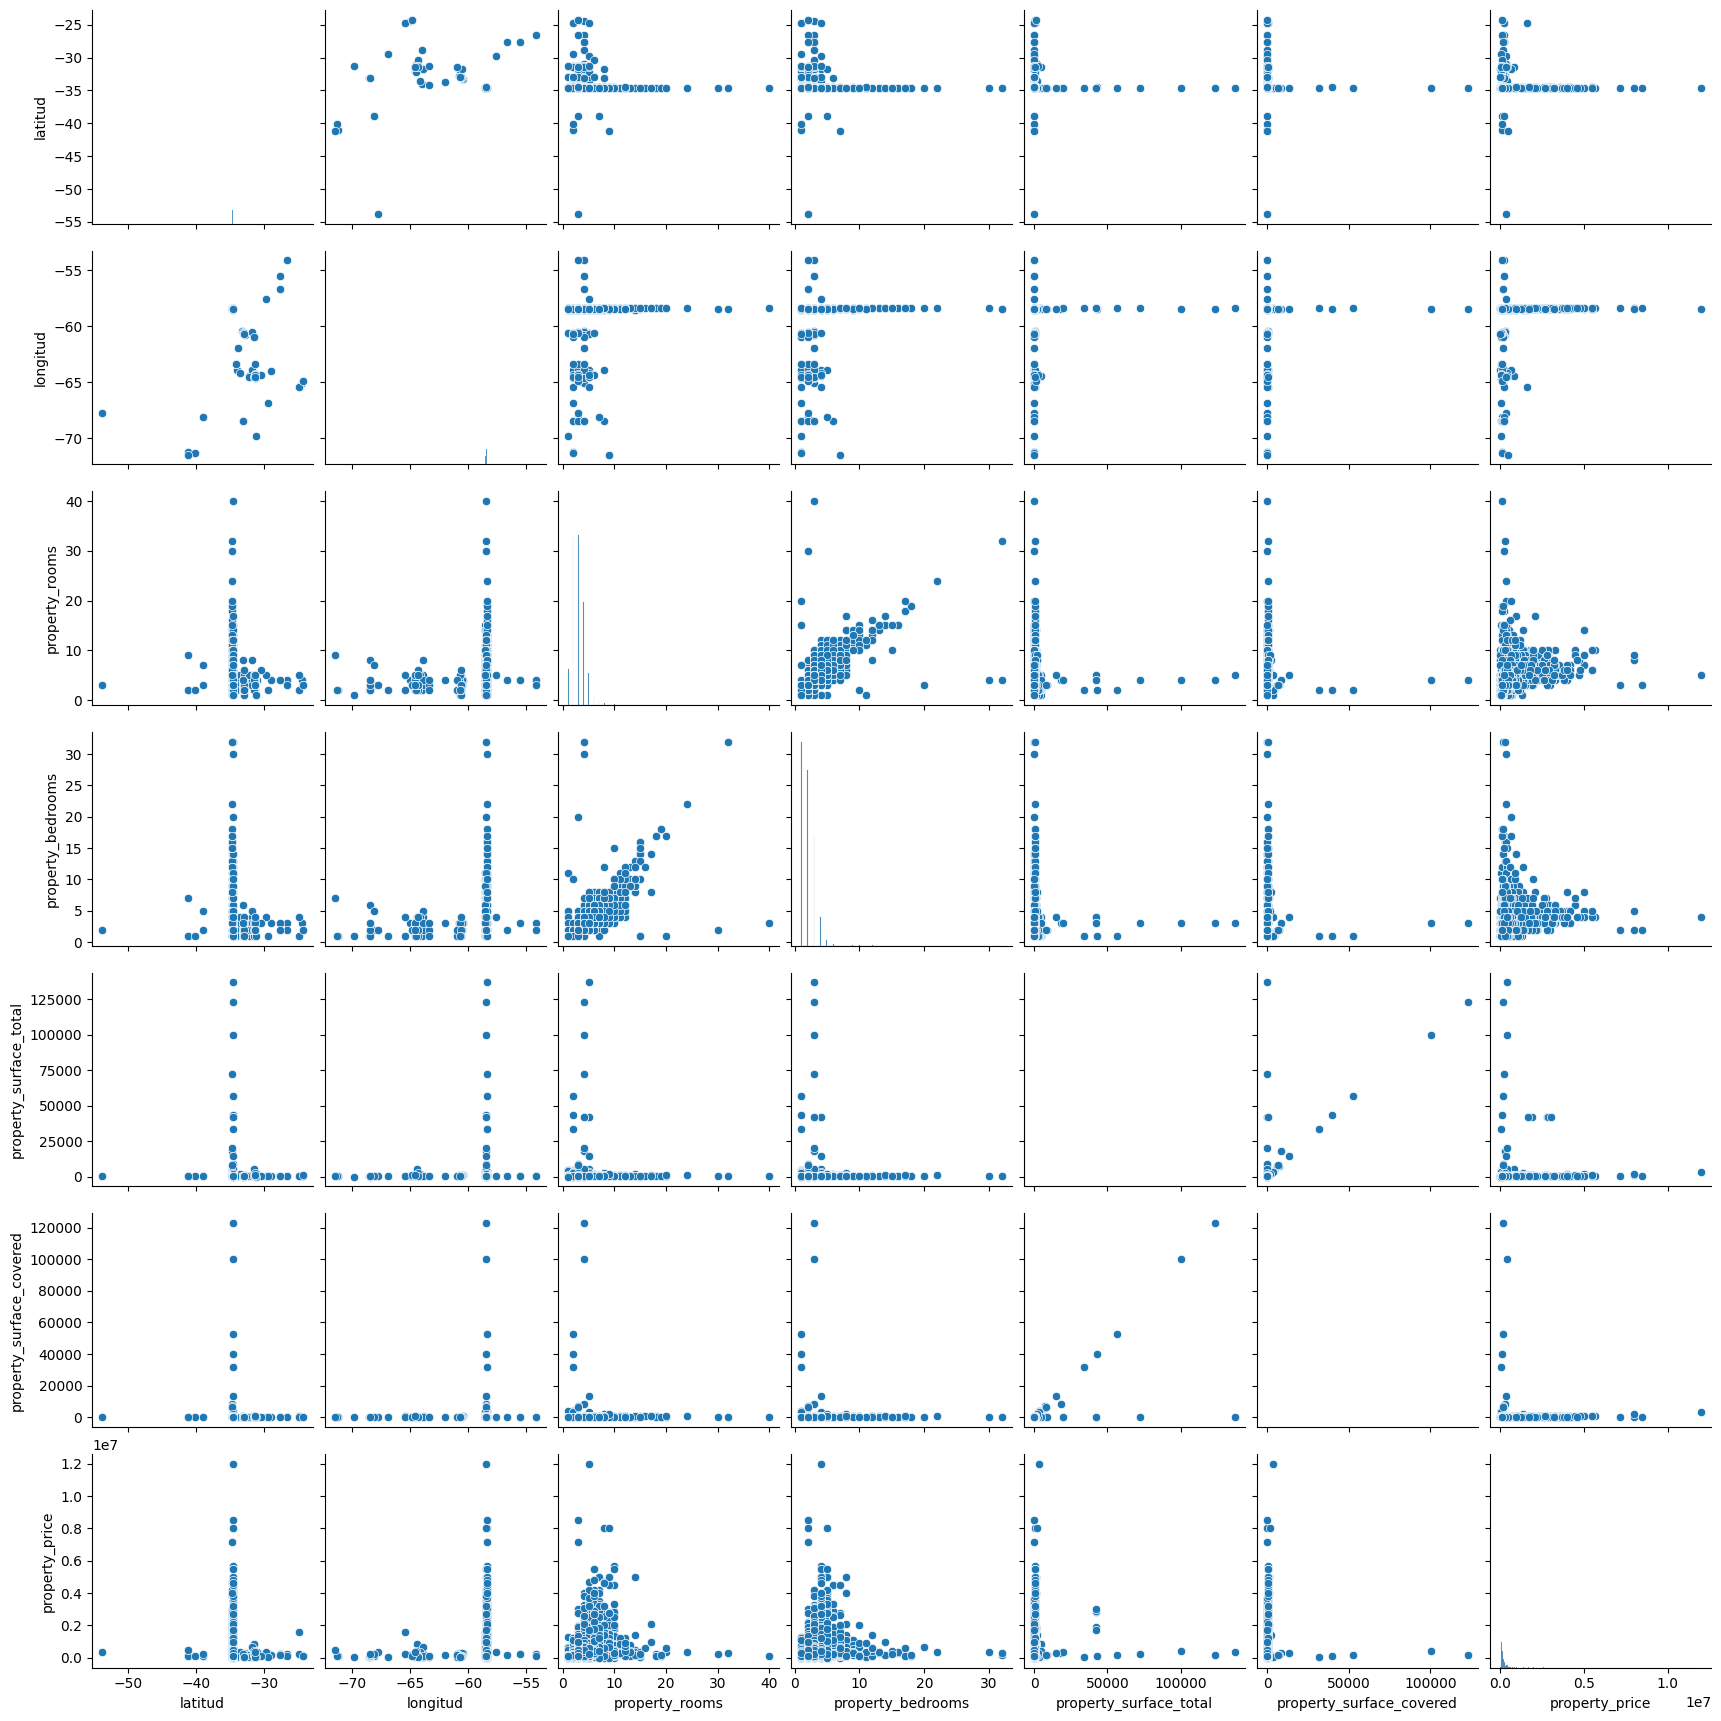

In [ ]:
sns.pairplot(train_knn)

Pareceria que no modifico mucho, por lo menos cualitativamente, el dataset

In [ ]:
train_knn.corr().style.background_gradient(cmap='coolwarm')

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.262141,0.005729,0.003123,0.009715,0.004212,0.021703
longitud,-0.262141,1.000000,-0.010105,-0.007572,-0.008316,-0.002010,0.025406
property_rooms,0.005729,-0.010105,1.000000,0.899563,0.066351,0.071244,0.477177
property_bedrooms,0.003123,-0.007572,0.899563,1.000000,0.062982,0.067072,0.419046
property_surface_total,0.009715,-0.008316,0.066351,0.062982,1.000000,0.700549,0.079104
property_surface_covered,0.004212,-0.002010,0.071244,0.067072,0.700549,1.000000,0.070184
property_price,0.021703,0.025406,0.477177,0.419046,0.079104,0.070184,1.000000


In [ ]:
pd.DataFrame(train, columns=["latitud","longitud","property_bedrooms","property_rooms","property_surface_total","property_surface_covered","property_price"]).corr().style.background_gradient(cmap='coolwarm')

,latitud,longitud,property_bedrooms,property_rooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.170190,0.003383,0.005095,0.024948,0.001977,0.016136
longitud,-0.170190,1.000000,-0.009899,-0.009621,-0.013870,-0.000922,0.022667
property_bedrooms,0.003383,-0.009899,1.000000,0.871975,0.065131,0.068354,0.417436
property_rooms,0.005095,-0.009621,0.871975,1.000000,0.066573,0.069484,0.481810
property_surface_total,0.024948,-0.013870,0.065131,0.066573,1.000000,0.661611,0.080646
property_surface_covered,0.001977,-0.000922,0.068354,0.069484,0.661611,1.000000,0.051809
property_price,0.016136,0.022667,0.417436,0.481810,0.080646,0.051809,1.000000


Entrenamiento

In [4]:
# Creo un modelo KNN para regresion y lo ajusto
knn_regressor = KNeighborsRegressor().fit(x_train_knn, y_train_knn)
y_pred_knn=knn_regressor.predict(x_test_knn)
y_pred_knn

performance_knn = pd.DataFrame({'Valor Real': y_test_knn,
                            'Prediccion': y_pred_knn,
                            'Error': y_test_knn - y_pred_knn})
# View
performance_knn.head()

from sklearn import metrics

def errores_modelo( y_pred, y_test):
  mse = metrics.mean_squared_error(
          y_true  = y_test_knn,
          y_pred  = y_pred,
          squared = True
        )

  rmse = metrics.mean_squared_error(
          y_true  = y_test_knn,
          y_pred  = y_pred,
          squared = False
         )

  print(f"El error (mse) de test es: {mse}")
  print(f"El error (rmse) de test es: {rmse}")

errores_modelo( y_pred_knn, y_test_knn)
knn_regressor.score(x_test_knn,y_test_knn)



from sklearn.model_selection import cross_val_score

for i in range(5,16):
  scores = cross_val_score(knn_regressor, x_test_knn, y_test_knn, scoring="neg_mean_squared_error", cv=i)
  print(i, "| Mean:", round(scores.mean(),3), " | std:", round(scores.std(),3))


El error (mse) de test es: 22883427544.009888
El error (rmse) de test es: 151272.69265802696
5 | Mean: -29582754323.448  | std: 2490750634.747
6 | Mean: -29888885850.504  | std: 2719463277.765
7 | Mean: -29612335270.578  | std: 4722477474.058
8 | Mean: -29231196695.503  | std: 3986918868.211
9 | Mean: -29113169379.572  | std: 4937937408.595
10 | Mean: -29242297133.169  | std: 3626880566.79
11 | Mean: -29214999499.377  | std: 4788081586.077
12 | Mean: -29018564340.914  | std: 6232006536.914
13 | Mean: -29566453267.099  | std: 6040064820.133
14 | Mean: -29272870699.397  | std: 6396973435.814
15 | Mean: -29055935843.575  | std: 6962870643.343


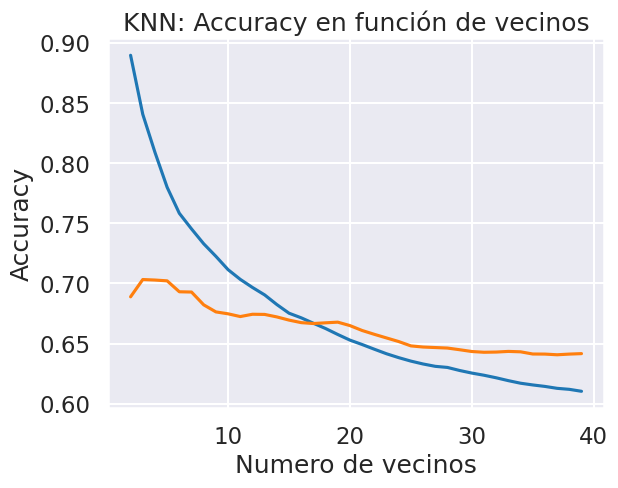

In [9]:
# Encontrando la mejor cantidad de vecinos con minkowski p=2
def vecinos_segun_hp_c_graf(pesos,algoritmo):
  scores_entrenamiento = []
  scores_test = []

  vecinos = np.arange(2,40,1)
  for vecino in vecinos:
    knn_tuning = KNeighborsRegressor(n_neighbors=vecinos).fit(x_train_knn, y_train_knn)
    scores_entrenamiento.append(knn_tuning.score(x_train_knn,y_train_knn))
    scores_test.append(knn_tuning.score(x_test_knn,y_test_knn))

  plt.plot(vecinos, scores_entrenamiento, label="Entrenamiento Accuracy")
  plt.plot(vecinos, scores_test, label="Test Accuracy")
  plt.xlabel("Numero de vecinos")
  plt.ylabel("Accuracy")
  plt.title("KNN: Accuracy en función de vecinos")
  plt.show()

  print("Cantidad de vecinos optima:", scores_test.index(max(scores_test)) + 2,max(scores_test), "Score entrenamiento: ", scores_entrenamiento[scores_test.index(max(scores_test))])


In [ ]:
# Encontrando la mejor cantidad de vecinos con minkowski p=2
def vecinos_segun_hp(pesos,algoritmo,potencia,tamaño_hoja):
  scores_entrenamiento = []
  scores_test = []

  vecinos = np.arange(2,40,1)
  for cant_vecino in vecinos:
    knn_tuning = KNeighborsRegressor(n_neighbors=cant_vecino,weights=pesos,algorithm=algoritmo,p=potencia).fit(x_train_knn, y_train_knn)
    scores_entrenamiento.append(knn_tuning.score(x_train_knn,y_train_knn))
    scores_test.append(knn_tuning.score(x_test_knn,y_test_knn))

  print("Cantidad de vecinos optima:", scores_test.index(max(scores_test)) + 2,max(scores_test), "Score entrenamiento: ", scores_entrenamiento[scores_test.index(max(scores_test))])

for potencia in range(1,6):
  print(potencia)
  vecinos_segun_hp("uniform","brute",potencia,30)
  vecinos_segun_hp("distance","brute",potencia,30)

  print("Algoritmos de arbol")
  for i in range(1,6):
    print("Tamaño de hoja",10*i)
    vecinos_segun_hp("uniform","kd_tree",potencia,10*i)
    vecinos_segun_hp("distance","kd_tree",potencia,10*i)
    vecinos_segun_hp("uniform","ball_tree",potencia,10*i)
    vecinos_segun_hp("distance","ball_tree",potencia,10*i)



1


In [ ]:
lr_model = LinearRegression().fit(x_train_knn, y_train_knn)
y_pred_lr = lr_model.predict(x_test_knn)

errores_modelo( y_pred_lr, y_test_knn)
lr_model.score(x_test_knn,y_test_knn)

El error (mse) de test es: 56524120405.79072
El error (rmse) de test es: 237748.01872106257


0.26440797740096156